In [2]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

NameError: name 'base_dir' is not defined

In [23]:
import os

# Directory with our training anime/human pictures

train_anime_dir = './train/anime-train'
train_human_dir = './train/human-train'

# Directory with our validation anime/human pictures
validation_anime_dir = './test/anime-test'
validation_human_dir = './test/human-test'

train_dir = './train'
validation_dir = './test'

print('total training anime images :', len(os.listdir(train_anime_dir ) ))
print('total training human images :', len(os.listdir(train_human_dir) ))

print('total validation anime images :', len(os.listdir( validation_anime_dir ) ))
print('total validation human images :', len(os.listdir( validation_human_dir ) ))

total training anime images : 751
total training human images : 751
total validation anime images : 250
total validation human images : 250


In [5]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

pic_index = 0 # Index for iterating over images

In [7]:
train_anime_fnames = os.listdir( train_anime_dir )
train_human_fnames = os.listdir( train_human_dir )

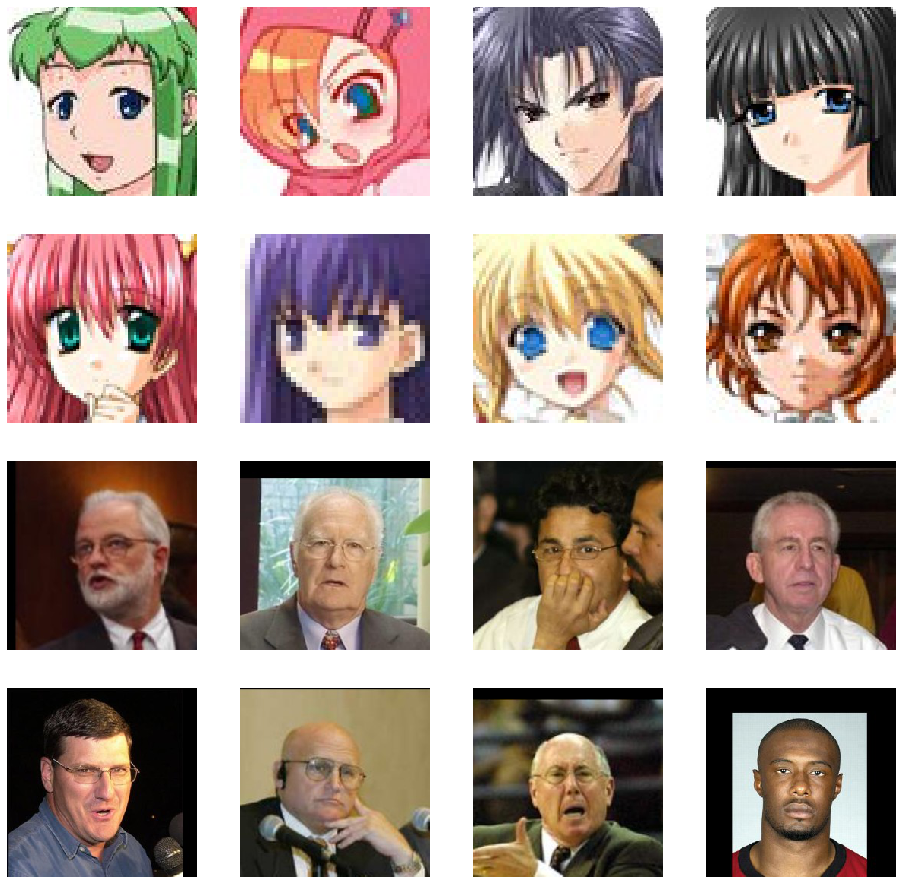

In [15]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)

pic_index+=8

next_anime_pix = [os.path.join(train_anime_dir, fname) 
                for fname in train_anime_fnames[ pic_index-8:pic_index] 
               ]

next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_anime_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [16]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2), 
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(), 
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'), 
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('cats') and 1 for the other ('dogs')
    tf.keras.layers.Dense(1, activation='sigmoid')  
])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 18496)             0

In [18]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics = ['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255.
train_datagen = ImageDataGenerator( rescale = 1.0/255. )
test_datagen  = ImageDataGenerator( rescale = 1.0/255. )

# --------------------
# Flow training images in batches of 20 using train_datagen generator
# --------------------
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20,
                                                    class_mode='binary',
                                                    target_size=(150, 150))     
# --------------------
# Flow validation images in batches of 20 using test_datagen generator
# --------------------
validation_generator =  test_datagen.flow_from_directory(validation_dir,
                                                         batch_size=20,
                                                         class_mode  = 'binary',
                                                         target_size = (150, 150))


Found 1502 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
history = model.fit_generator(train_generator,
                              validation_data=validation_generator,
                              steps_per_epoch=100,
                              epochs=5,
                              validation_steps=50,
                              verbose=2)

Epoch 1/5
100/100 - 27s - loss: 0.0388 - acc: 0.9944 - val_loss: 0.0046 - val_acc: 0.9980
Epoch 2/5
100/100 - 27s - loss: 0.0154 - acc: 0.9975 - val_loss: 0.0409 - val_acc: 0.9920
Epoch 3/5
100/100 - 27s - loss: 0.0144 - acc: 0.9980 - val_loss: 8.1392e-05 - val_acc: 1.0000
Epoch 4/5
100/100 - 27s - loss: 0.0051 - acc: 0.9990 - val_loss: 2.8969e-06 - val_acc: 1.0000
Epoch 5/5
100/100 - 30s - loss: 8.8420e-06 - acc: 1.0000 - val_loss: 1.0761e-08 - val_acc: 1.0000


In [30]:
import numpy as np

import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path='/content/' + fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a Human")
    
  else:
    print(fn + " is a Anime")

ModuleNotFoundError: No module named 'files'